In [16]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import re
import numpy as np

In [36]:
euroleague_palette = sns.color_palette([(0, 0, 0, 0.6), (1.0, 0.4, 0, 0.6)])


In [18]:
df = pd.read_csv('EL_Dataset\euroleague_players.csv')

In [19]:
pd.set_option('display.max_columns', None)

Generating true shoot percantage 

C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\1604088248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_tsperc, x='true_shoot_perc', y='player', orient='h', saturation=1, palette=euroleague_palette)
C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\1604088248.py:9: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_tsperc, x='true_shoot_perc', y='player', orient='h', saturation=1, palette=euroleague_palette)


Text(0.5, 1.0, 'True shooting percentage(2PT + 3PT + FT) in season 2023/24')

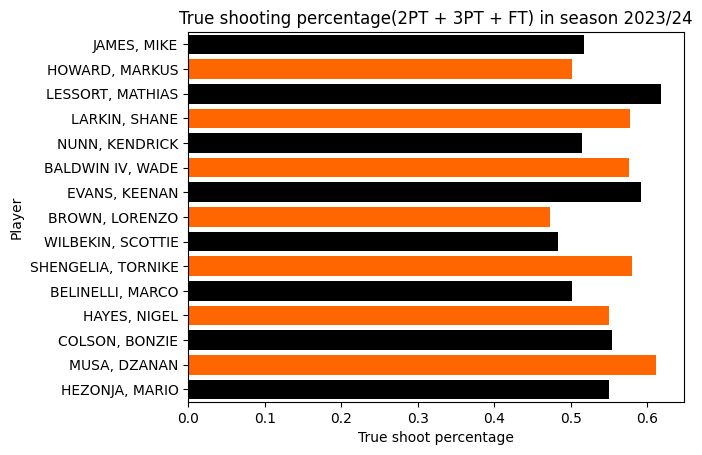

In [37]:
df['three_points_attempted'].isna().any() #checking if there is any not available field
df['total_shoots_attempted'] = df['two_points_attempted'] + df['three_points_attempted'] + df['free_throws_attempted']
df['total_shoots_made'] = df['two_points_made'] + df['three_points_made'] + df['free_throws_made']
df['true_shoot_perc'] = df['total_shoots_made'] / df['total_shoots_attempted']


#df.drop(columns=['total_shoots_attempted'], inplace=True)
df_tsperc = df[(df['total_shoots_attempted'] >= 200) & (df['season_code'] == 'E2023')].sort_values(by='total_shoots_attempted', ascending=False).head(15)
sns.barplot(data=df_tsperc, x='true_shoot_perc', y='player', orient='h', saturation=1, palette=euroleague_palette)
plt.xlabel('True shoot percentage')
plt.ylabel('Player')
plt.title('True shooting percentage(2PT + 3PT + FT) in season 2023/24')


In [21]:
df_play_by_play_2023 = pd.read_csv('EL_Dataset\euroleague_play_by_play.csv')
df_play_by_play_2023 = df_play_by_play_2023[df_play_by_play_2023['season_code'] == 'E2023']
df_play_by_play_2023 = df_play_by_play_2023.dropna(subset=['player'])


In [22]:
df_number_of_plays = df_play_by_play_2023.groupby('player').agg(number_of_plays=('game_play_id', 'count')).sort_values(by='number_of_plays',ascending=False)
df_number_of_plays.head(15)



,number_of_plays
player,
"LESSORT, MATHIAS",1714
"JAMES, MIKE",1660
"HOWARD, MARKUS",1481
"BROWN, LORENZO",1440
"EVANS, KEENAN",1415
"MILLER-MCINTYRE, CODI",1374
"LARKIN, SHANE",1342
"CAMPAZZO, FACUNDO",1340
"SHENGELIA, TORNIKE",1326


C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\1817554776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_number_of_plays.head(15), x='number_of_plays', y='player', orient='h', color='green', saturation=1, palette=euroleague_palette)
C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\1817554776.py:1: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_number_of_plays.head(15), x='number_of_plays', y='player', orient='h', color='green', saturation=1, palette=euroleague_palette)


Text(0.5, 1.0, 'Most involved players in games in season 2023/24')

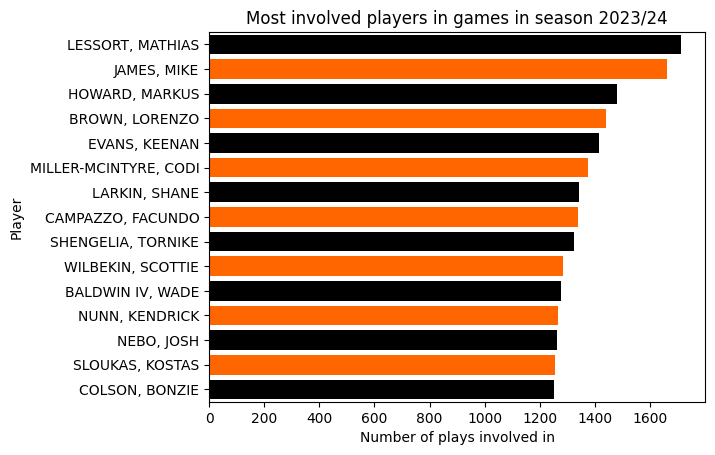

In [38]:
sns.barplot(data=df_number_of_plays.head(15), x='number_of_plays', y='player', orient='h', color='green', saturation=1, palette=euroleague_palette)
plt.xlabel('Number of plays involved in')
plt.ylabel('Player')
plt.title('Most involved players in games in season 2023/24')

In [24]:
df_clutch_players = df_play_by_play_2023[(df_play_by_play_2023['minute'] >= 38) & (df_play_by_play_2023['play_info'].str.contains('Pointer')) & (~df_play_by_play_2023['play_info'].str.contains('Missed'))]
df_clutch_players = df_clutch_players.groupby('player').agg(clutch_moments_no=('game_play_id', 'size'))
df_clutch_players.sort_values(by='clutch_moments_no', ascending=False, inplace=True)
df_clutch_players



,clutch_moments_no
player,
"JAMES, MIKE",29
"EVANS, KEENAN",24
"HEZONJA, MARIO",24
"WILBEKIN, SCOTTIE",23
"LESSORT, MATHIAS",22
...,...
"LOUNTZIS, MICHALIS",1
"KALAITZAKIS, PANAGIOTIS",1
"THEODORE, JORDAN",1


C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\3351914390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clutch_players.head(15), x='clutch_moments_no', y='player', orient='h', color='green', saturation=1, palette=euroleague_palette)
C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\3351914390.py:1: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_clutch_players.head(15), x='clutch_moments_no', y='player', orient='h', color='green', saturation=1, palette=euroleague_palette)


Text(0.5, 1.0, 'Most clutch players in season 2023/24')

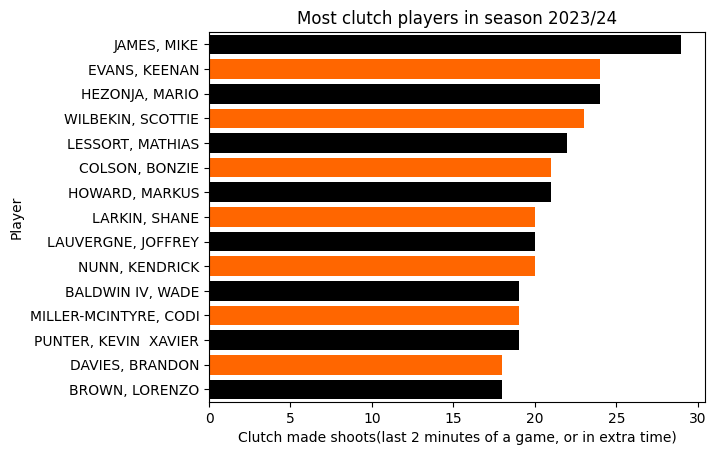

In [39]:
sns.barplot(data=df_clutch_players.head(15), x='clutch_moments_no', y='player', orient='h', color='green', saturation=1, palette=euroleague_palette)
plt.xlabel('Clutch made shoots(last 2 minutes of a game, or in extra time)')
plt.ylabel('Player')
plt.title('Most clutch players in season 2023/24')

In [26]:
df_teams_wins_2023 = pd.read_csv('EL_Dataset\euroleague_header.csv')
df_teams_wins_2023 = df_teams_wins_2023[(df_teams_wins_2023['season_code'] == 'E2023') & (df_teams_wins_2023['phase'] == 'REGULAR SEASON')]


df_teams_wins_2023['home_win'] = df_teams_wins_2023['score_a'] > df_teams_wins_2023['score_b']
df_teams_wins_2023['away_win'] = df_teams_wins_2023['score_b'] > df_teams_wins_2023['score_a']

home_wins = df_teams_wins_2023[df_teams_wins_2023['home_win']].groupby('team_a').size().rename('home_wins')
away_wins = df_teams_wins_2023[df_teams_wins_2023['away_win']].groupby('team_b').size().rename('away_wins')

teams = pd.Index(home_wins.index).append(pd.Index(away_wins.index)).unique()

results = pd.DataFrame(index=teams)
results['home_wins'] = home_wins
results['away_wins'] = away_wins
results = results.fillna(0)  # Fill NaNs with 0

temp = results.loc[['PANATHINAIKOS AKTOR ATHENS', 'PANATHINAIKOS ATHENS']].sum()
results.loc['PANATHINAIKOS'] = temp
results.drop(['PANATHINAIKOS AKTOR ATHENS', 'PANATHINAIKOS ATHENS'], inplace=True)
results['difference'] = results['home_wins'] - results['away_wins']
results.sort_values(by='difference', inplace=True, ascending=False)
results.reset_index(inplace=True)
results = results.rename(columns={'index': 'team'})
results





,team,home_wins,away_wins,difference
0,FENERBAHCE BEKO ISTANBUL,15,5,10
1,EA7 EMPORIO ARMANI MILAN,12,3,9
2,ANADOLU EFES ISTANBUL,13,4,9
3,FC BARCELONA,15,7,8
4,PARTIZAN MOZZART BET BELGRADE,12,4,8
5,VIRTUS SEGAFREDO BOLOGNA,12,5,7
6,MACCABI PLAYTIKA TEL AVIV,13,7,6
7,PANATHINAIKOS,14,9,5
8,CRVENA ZVEZDA MERIDIANBET BELGRADE,8,3,5
9,FC BAYERN MUNICH,9,4,5


C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\659353709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results.head(18), x='difference', y='team', orient='h', color='green', saturation=1, palette=euroleague_palette)
C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\659353709.py:1: UserWarning: 
The palette list has fewer values (2) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=results.head(18), x='difference', y='team', orient='h', color='green', saturation=1, palette=euroleague_palette)


Text(0.5, 1.0, 'Hottest home courts in EL in season 2023/24')

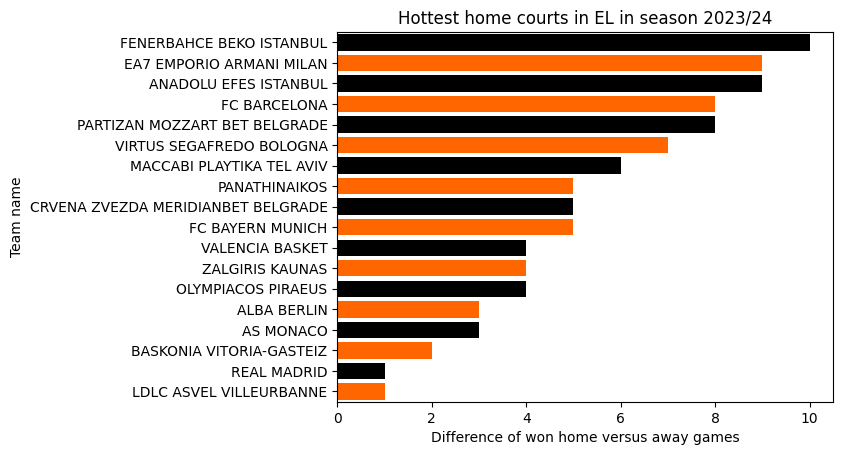

In [42]:
sns.barplot(data=results.head(18), x='difference', y='team', orient='h', color='green', saturation=1, palette=euroleague_palette)
plt.xlabel('Difference of won home versus away games')
plt.ylabel('Team name')
plt.title('Hottest home courts in EL in season 2023/24')

C:\Users\Ivan\AppData\Local\Temp\ipykernel_7604\3436944011.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_val_per_minute, x='minutes', y='valuation_per_minute', palette=euroleague_palette, color='#FF6600')
c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in t

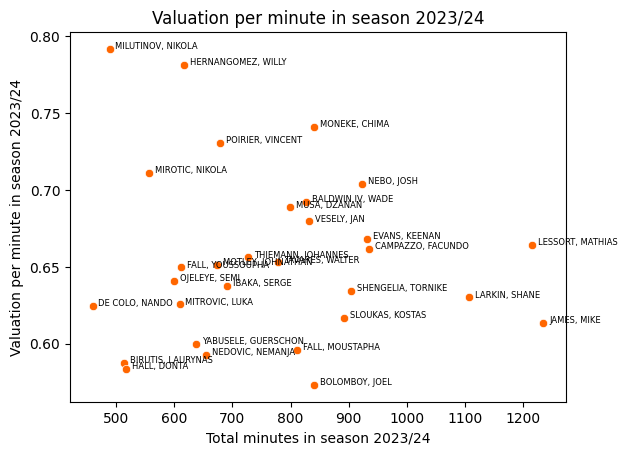

In [44]:
df_val_per_minute = df[(df['season_code'] == 'E2023') & (df['minutes'] >= 400)].copy()
df_val_per_minute['valuation_per_minute'] = df_val_per_minute['valuation'] / df_val_per_minute['minutes']
df_val_per_minute = df_val_per_minute.loc[:,['player', 'valuation_per_minute', 'minutes']].sort_values(by='valuation_per_minute', ascending=False).fillna(0).head(30)
sns.scatterplot(data=df_val_per_minute, x='minutes', y='valuation_per_minute', palette=euroleague_palette, color='#FF6600')

for i in range(len(df_val_per_minute)):
    plt.text(df_val_per_minute.iloc[i:i+1]['minutes'] + 10, df_val_per_minute.iloc[i:i+1]['valuation_per_minute'], re.sub(r'\d+', '', df_val_per_minute.iloc[i:i+1]['player'].to_string()).strip(), fontsize=6)

plt.xlabel("Total minutes in season 2023/24")
plt.ylabel("Valuation per minute in season 2023/24")
plt.title("Valuation per minute in season 2023/24")


    
plt.show()